In [3]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer 

# Load CSV files

In [4]:
start = timer()

# file = 'standardized_paysim.csv'
# path = '../Data/'
# Cleaned data
file_o = 'paysim.csv'
path_o = '../Data/'

# Standarized 
# paysim = pd.read_csv(path+file)
# Non Standarized
paysim_o = pd.read_csv(path_o+file_o)
# 
paysim_o = pd.get_dummies(paysim_o, drop_first=True)
# 
end = timer()
print(f'{(end - start)} seconds elapsed.')

6.378819751000002 seconds elapsed.


### Display Data for both DataFrames

In [3]:
# paysim.describe()

In [4]:
# paysim.sample(5)

In [5]:
paysim_o.sample(5)

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest,transType_CASH_OUT,transType_DEBIT,transType_PAYMENT,transType_TRANSFER,nameDest_M
1220908,133,25009.85,0.00,0.00,0.00,0.00,0,25009.85,25009.85,0,0,1,0,1
2014302,180,163177.86,420.00,163597.86,192199.28,29021.42,0,326355.72,326355.72,0,0,0,0,0
2351527,189,238968.80,0.00,0.00,263030.39,501999.19,0,238968.80,0.00,1,0,0,0,0
2644774,209,206937.42,39229.73,0.00,10491567.36,10698504.78,0,167707.69,0.00,1,0,0,0,0
395093,18,5238.43,0.00,0.00,154915.39,160153.82,0,5238.43,0.00,1,0,0,0,0


### Create X & y for both CSV files

In [5]:
# Standarized
# y =  paysim['isFraud']
# X =  paysim.loc[:, paysim.columns != 'isFraud']

# X, y full data
y =  paysim_o['isFraud']
X =  paysim_o.loc[:, paysim_o.columns != 'isFraud']
# 

seed = 1
# 

In [6]:
X.sample(5)

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,diffBalanceOrig,diffBalanceDest,transType_CASH_OUT,transType_DEBIT,transType_PAYMENT,transType_TRANSFER,nameDest_M
1764125,162,23707.57,0.00,0.00,0.00,0.00,23707.57,23707.57,0,0,1,0,1
813086,40,2883.56,280.00,0.00,0.00,0.00,2603.56,2883.56,0,0,1,0,1
390445,17,424884.55,10605.00,0.00,395695.50,820580.05,414279.55,0.00,0,0,0,1,0
4441626,323,80678.19,2463268.49,2543946.68,285485.58,204807.39,161356.38,161356.38,0,0,0,0,0
865190,42,199468.40,0.00,0.00,276671.87,290507.50,199468.40,185632.77,1,0,0,0,0


In [7]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### imblearn under sampling (RandomUnderSampler)

In [8]:
from imblearn.under_sampling import RandomUnderSampler
# 
start = timer()

params_fixed = {
    'sampling_strategy' : 'auto',
    'random_state' : seed,
    'replacement' : False,
}
# # Model
rus = RandomUnderSampler(**params_fixed)
# # fit predictor and target variable
# x_rus, y_rus = rus.fit_resample(X, y)
# print('Original standarized dataset shape:', len(y))
# print('Resample standarized dataset shape', len(y_rus))
# print('\n')

# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)
print('Original Non standarized dataset shape:', len(y))
print('Resample Non standarized dataset shape', len(y_rus))
print('\n')

end = timer()
print(f'{(end - start)} seconds elapsed.')

Original Non standarized dataset shape: 6362620
Resample Non standarized dataset shape 16426


1.7282325670000063 seconds elapsed.


### Synthetic Minority Oversampling Technique (SMOTE & SMOTETomek)

In [9]:
# import library
from imblearn.over_sampling import SMOTE
# 
start = timer()
# 
params_fixed = {'sampling_strategy' : 'not majority',
                'random_state' : seed,
                'k_neighbors' : (5),
                'n_jobs' : (-1),
               }
# Model
oversample = SMOTE(**params_fixed)
# 

# fit predictor and target variable
x_smote, y_smote = oversample.fit_resample(X, y)

print('SMOTE Original standarized dataset shape', len(y))
print('SMOTE Resample standarized dataset shape', len(y_smote))
print('\n')

# # fit predictor and target variable
# x_smote_ns, y_smote_ns = oversample.fit_resample(X_ns, y_ns)

# print('SMOTE Original Non standarized dataset shape', len(y_ns))
# print('SMOTE Resample Non standarized dataset shape', len(y_smote_ns))
# print('\n')

end = timer()
print(f'{(end - start)} seconds elapsed.')

SMOTE Original standarized dataset shape 6362620
SMOTE Resample standarized dataset shape 12708814


6.433259788000001 seconds elapsed.


### Cant get this to run!!!

In [11]:
# # import library
# from imblearn.combine import SMOTETomek 
# # 
# start = timer()
# # 
# params_ = {'sampling_strategy' : 'not majority',
#            'random_state' : seed,
#            'smote' : None,
#            'tomek' : None,
#            'n_jobs' : (-1),
#            }
# # Model
# smt = SMOTETomek(**params_)
# # fit predictor and target variable
# x_smt, y_smt = smt.fit_resample(X, y)

# print('SMOTETomek Original standarized dataset shape', len(y))
# print('SMOTETomek Resample standarized dataset shape', len(y_smt))
# print('\n')

# # fit predictor and target variable
# x_smt_ns, y_smt_ns = smt.fit_resample(X_ns, y_ns)

# print('SMOTETomek Original Non standarized dataset shape', len(y_ns))
# print('SMOTETomek Resample Non standarized dataset shape', len(y_smt_ns))
# print('\n')

# end = timer()
# print(f'{(end - start)} seconds elapsed.')

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
t_size=0.25
# 
start = timer()
# 
# Random standarized under-sampling with imblearn
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=t_size, 
                                                                    random_state=seed, stratify=y_rus)

# Random Non standarized under-sampling with imblearn
# X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus_ns, y_rus_ns, test_size=t_size, 
#                                                                     random_state=seed, stratify=y_rus_ns)

# Standarized Full Dataset
# X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X, y, test_size=t_size, 
#                                                                 random_state=seed, stratify=y)

# Non Standarized Full Dataset
X_train_nsf, X_test_nsf, y_train_nsf, y_test_nsf = train_test_split(X, y, test_size=t_size, 
                                                                    random_state=seed, stratify=y)

# Standarized over-sampling SMOTE Dataset
# X_train_so, X_test_so, y_train_so, y_test_so = train_test_split(x_smote, y_smote, test_size=t_size,
#                                                                 random_state=seed, stratify=y_smote)

# Standarized over-sampling SMOTETomek Dataset
# X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(x_smt, y_smt, test_size=t_size,
#                                                                 random_state=seed, stratify=y_smt)

# Non Standarized over-sampling SMOTE Dataset
X_train_nso, X_test_nso, y_train_nso, y_test_nso = train_test_split(x_smote, y_smote, test_size=t_size, 
                                                                    random_state=seed, stratify=y_smote)

# Non Standarized over-sampling SMOTETomek Dataset
# X_train_smt_nso, X_test_smt_nso, y_train_smt_nso, y_test_smt_nso = train_test_split(x_smt_ns, y_smt_ns, 
#                                                                test_size=t_size, random_state=seed, stratify=y_smt_ns)

end = timer()
print(f'{(end - start)} seconds elapsed.')

13.030562771 seconds elapsed.


### Import Model/Search/Matrics

In [11]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# XG Boost Classifier
from xgboost import XGBClassifier
# Light GBM Classifier
from lightgbm import LGBMClassifier
# Support Vector Machine
from sklearn import svm
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# 

In [14]:
# steps = [()] RandomForestClassifier
params_rfc = {'n_jobs' : (-1),
              'random_state' : seed,
             }
# Pipeline
rfc_scaler_rus = [('scaler', StandardScaler()), ('rfc', RandomForestClassifier(**params_rfc))]
rfc_normal_rus = [('normal', MinMaxScaler()), ('rfc', RandomForestClassifier(**params_rfc))]
rfc_scaler_nso = [('scaler', StandardScaler()), ('rfc', RandomForestClassifier(**params_rfc))]
rfc_normal_nsf = [('normal', MinMaxScaler()), ('rfc', RandomForestClassifier(**params_rfc))] 
# Pipeline
# under sample
pipe_scaler_rus = Pipeline(rfc_scaler_rus)
pipe_normal_rus = Pipeline(rfc_normal_rus)
# Over sample (SMOTE)
pipe_nso = Pipeline(rfc_scaler_nso)
# Full
pipe_nsf = Pipeline(rfc_normal_nsf)

# Random Forest

#### Random Forest Model with MinMaxScaler Under sample Data

187 ms ± 7.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

[[2053    0]
 [  10 2044]]
Pipeline(steps=[('normal', MinMaxScaler()),
                ('rfc', RandomForestClassifier(n_jobs=-1, random_state=1))])


                    RF %-importance
diffBalanceOrig            0.381491
newbalanceOrig             0.140750
oldbalanceOrig             0.127924
amount                     0.068909
nameDest_M                 0.061185
transType_TRANSFER         0.052290
transType_PAYMENT          0.046690
diffBalanceDest            0.028448
transType_CASH_OUT         0.027190
step                       0.026782
newbalanceDest             0.019442
oldbalanceDest       

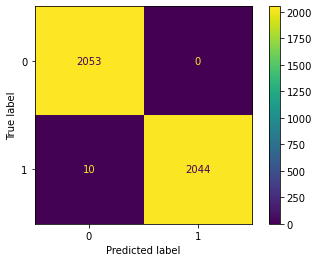

In [15]:
start = timer()
# 
%timeit pipe_normal_rus.fit(X_train_rus, y_train_rus)
# 
y_predRFC = pipe_normal_rus.predict(X_test_rus)
print('\n')
print(classification_report(y_test_rus, y_predRFC))
print(confusion_matrix(y_test_rus, y_predRFC))
print(pipe_normal_rus)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predRFC)), 
                              display_labels=pipe_normal_rus.named_steps['rfc'].classes_)
disp.plot()
# 
# print(pipe_normal_rus.named_steps['rfc'])
#
df = pd.DataFrame(pipe_normal_rus.named_steps['rfc'].feature_importances_, index=X_test_rus.columns, 
                  columns=["RF %-importance"])
print(df.sort_values("RF %-importance", axis=0, ascending=False))
# 
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

### Random Forest Model with StandardScaler Under sample Data

193 ms ± 5.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

[[2053    0]
 [  10 2044]]
Pipeline(steps=[('scaler', StandardScaler()),
                ('rfc', RandomForestClassifier(n_jobs=-1, random_state=1))])


                    RF %-importance
diffBalanceOrig            0.380277
newbalanceOrig             0.143516
oldbalanceOrig             0.128090
amount                     0.067959
nameDest_M                 0.061928
transType_TRANSFER         0.052167
transType_PAYMENT          0.045949
step                       0.028003
transType_CASH_OUT         0.027068
diffBalanceDest            0.025501
oldbalanceDest             0.020606
newbalanceDest   

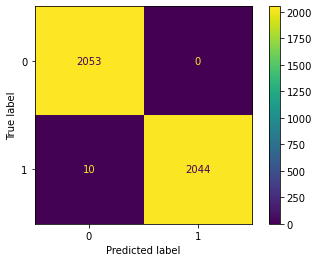

In [16]:
start = timer()
# 
%timeit pipe_scaler_rus.fit(X_train_rus, y_train_rus)
# 
y_predRFC = pipe_scaler_rus.predict(X_test_rus)
print('\n')
print(classification_report(y_test_rus, y_predRFC))
print(confusion_matrix(y_test_rus, y_predRFC))
print(pipe_scaler_rus)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predRFC)), 
                              display_labels=pipe_scaler_rus.named_steps['rfc'].classes_)
disp.plot()
# 
# print(pipe_normal_rus.named_steps['rfc'])
#
df = pd.DataFrame(pipe_scaler_rus.named_steps['rfc'].feature_importances_, index=X_test_rus.columns, 
                  columns=["RF %-importance"])
print(df.sort_values("RF %-importance", axis=0, ascending=False))
# 
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### Random Forest Model with NON-Standarized/Normalized Under sample Data

192 ms ± 3.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

[[2053    0]
 [  10 2044]]
RandomForestClassifier(n_jobs=-1, random_state=1)


                    RF %-importance
diffBalanceOrig            0.379100
newbalanceOrig             0.131182
oldbalanceOrig             0.129591
amount                     0.067110
nameDest_M                 0.059237
transType_TRANSFER         0.057216
transType_PAYMENT          0.044107
transType_CASH_OUT         0.034257
step                       0.026363
oldbalanceDest             0.024345
diffBalanceDest            0.023385
newbalanceDest             0.023188
transType_DEBIT            0.000918


0.52272022016666

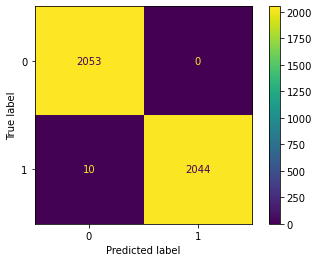

In [17]:
# RF Model with Non Standarized Under sample Data
rfc_ = RandomForestClassifier(**params_rfc)

%timeit rfc_.fit(X_train_rus, y_train_rus)
# 
y_predRFC = rfc_.predict(X_test_rus)
print('\n')
print(classification_report(y_test_rus, y_predRFC))
print(confusion_matrix(y_test_rus, y_predRFC))
print(rfc_)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predRFC)), 
                              display_labels=rfc_.classes_)
disp.plot()
# 
df = pd.DataFrame(rfc_.feature_importances_, index=X_test_rus.columns, columns=["RF %-importance"])
print(df.sort_values("RF %-importance", axis=0, ascending=False))
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### Random Forest Model with NON-Standarized Full Data

2min 15s ± 694 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       1.00      1.00      1.00      2053

    accuracy                           1.00   1590655
   macro avg       1.00      1.00      1.00   1590655
weighted avg       1.00      1.00      1.00   1590655

[[1588602       0]
 [      8    2045]]
RandomForestClassifier(n_jobs=-1, random_state=1)


                    RF %-importance
newbalanceOrig             0.398074
diffBalanceOrig            0.152242
newbalanceDest             0.102080
diffBalanceDest            0.095326
amount                     0.093836
oldbalanceOrig             0.054102
step                       0.033900
transType_TRANSFER         0.028071
oldbalanceDest             0.026075
transType_CASH_OUT         0.013162
transType_PAYMENT          0.002062
nameDest_M                 0.000946
transType_DEBIT            0.000122


18.86

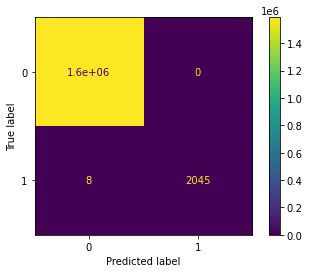

In [18]:
# Standard RF Model with Non Standarized Under sample Data
rfc_nsf = RandomForestClassifier(**params_rfc)

%timeit rfc_nsf.fit(X_train_nsf, y_train_nsf)
# 
y_predRFC_nsf = rfc_nsf.predict(X_test_nsf)
print('\n')
print(classification_report(y_test_nsf, y_predRFC_nsf))
print(confusion_matrix(y_test_nsf, y_predRFC_nsf))
print(rfc_nsf)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_nsf, y_predRFC_nsf)), 
                              display_labels=rfc_nsf.classes_)
disp.plot()
# 
df = pd.DataFrame(rfc_nsf.feature_importances_, index=X_test_nsf.columns, columns=["RF %-importance"])
print(df.sort_values("RF %-importance", axis=0, ascending=False))
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### Random Forest Model with NON-Standarized SMOTE Dataset

4min 54s ± 3.34 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       1.00      1.00      1.00   1588602

    accuracy                           1.00   3177204
   macro avg       1.00      1.00      1.00   3177204
weighted avg       1.00      1.00      1.00   3177204

[[1588528      74]
 [     54 1588548]]
RandomForestClassifier(n_jobs=-1, random_state=1)


                    RF %-importance
diffBalanceOrig            0.389318
newbalanceOrig             0.130369
oldbalanceOrig             0.130247
amount                     0.069214
nameDest_M                 0.058776
transType_TRANSFER         0.050940
transType_PAYMENT          0.043447
diffBalanceDest            0.032526
transType_CASH_OUT         0.027809
step                       0.027678
oldbalanceDest             0.020691
newbalanceDest             0.017571
transType_DEBIT            0.001413


58.40

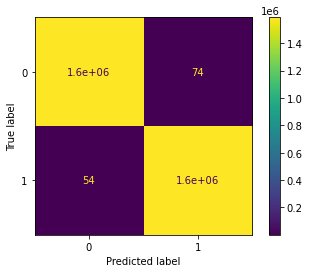

In [19]:
# Standard RF Model
rfc_ = RandomForestClassifier(**params_rfc)

%timeit rfc_.fit(X_train_nso, y_train_nso)
# 
y_predRFC_ = rfc_.predict(X_test_nso)
print('\n')
print(classification_report(y_test_nso, y_predRFC_))
print(confusion_matrix(y_test_nso, y_predRFC_))
print(rfc_)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_nso, y_predRFC_)), 
                              display_labels=rfc_.classes_)
disp.plot()
# 
df = pd.DataFrame(rfc_.feature_importances_, index=X_test_nso.columns, columns=["RF %-importance"])
print(df.sort_values("RF %-importance", axis=0, ascending=False))
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

### Random Forest Model with NON-Standarized SMOTETomek Dataset¶

In [20]:
# # RF Model
# rfc_smt = RandomForestClassifier(**params_rfc)

# %timeit rfc_smt.fit(X_train_smt_nso, y_train_smt_nso)
# # 
# y_predRFC_smt = rfc_smt.predict(X_test_smt_nso)
# print('\n')
# print(classification_report(y_test_smt_nso, y_predRFC_smt))
# print(confusion_matrix(y_test_smt_nso, y_predRFC_smt))
# print(rfc_smt)
# print('\n')
# disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_smt_nso, y_predRFC_smt)), 
#                               display_labels=rfc_smt.classes_)
# disp.plot()
# # 
# df = pd.DataFrame(rfc_smt.feature_importances_, index=X_test_smt_nso.columns, columns=["RF %-importance"])
# print(df.sort_values("RF %-importance", axis=0, ascending=False))
# end = timer()
# print('\n')
# print(f'{(end - start)/60} Min elapsed.')

#### Random Forest Model NON-Standard Under-sampled RandomizedSearchCV

In [21]:
#Create a Random Forest Classifier
rfc_nsf = RandomForestClassifier(**params_rfc)

# RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# 
rfc_random = RandomizedSearchCV(estimator = rfc_nsf, param_distributions = random_grid, n_iter = 100, 
                                cv = 3, verbose=2, random_state=seed, n_jobs = -1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
4min ± 347 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

[[2053    0]
 [   7 2047]]


{'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'm

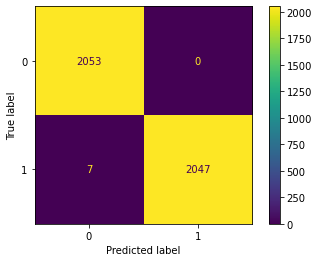

In [22]:
start = timer()
# 
#Train the model using the training sets - under sample standarized
%timeit rfc_random.fit(X_train_rus, y_train_rus)
# 
y_prednsf = rfc_random.predict(X_test_rus)
# 
print('\n')
print(classification_report(y_test_rus, y_prednsf))
print(confusion_matrix(y_test_rus, y_prednsf))
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_prednsf)), 
                              display_labels=rfc_random.classes_)
disp.plot()
print(rfc_random.best_params_)
print('\n')
end = timer()
print(f'{(end - start)/60} Min elapsed.')

# XGB Classifier

#### XGB Classifier Model Pipeline

In [23]:
# Pipeline
# 
params_xgb = {
    'objective':'binary:logistic',
    'use_label_encoder' : False,
    'n_jobs' : (-1),
#     'eval_metric' : 'logloss',    
    'eval_metric' : 'auc',
    'random_state' : seed,
}
# 
xgb_scaler_rus = [('scaler', StandardScaler()), ('xgb', XGBClassifier(**params_xgb))]
xgb_normal_rus = [('normal', MinMaxScaler()), ('xgb', XGBClassifier(**params_xgb))]
xgb_scaler_nso = [('scaler', StandardScaler()), ('xgb', XGBClassifier(**params_xgb))]
xgb_normal_nsf = [('normal', MinMaxScaler()), ('xgb', XGBClassifier(**params_xgb))]
# under sample
pipe_scaler_rus = Pipeline(xgb_scaler_rus)
pipe_normal_rus = Pipeline(xgb_normal_rus)
# Over sample (SMOTE)
pipe_nso = Pipeline(xgb_scaler_nso)
# Full
pipe_nsf = Pipeline(xgb_normal_nsf)

#### XGB Classifier Model with Scaler Under-Sampled Dataset



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

[[2053    0]
 [   6 2048]]
[('scaler', StandardScaler()), ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, val

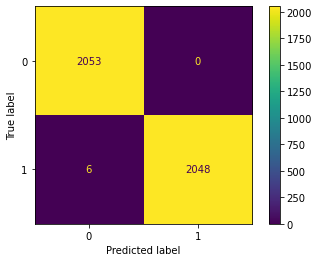

In [24]:
start = timer()
#Train the model using the training sets
pipe_scaler_rus.fit(X_train_rus,y_train_rus)
# 
y_predXGB = pipe_scaler_rus.predict(X_test_rus)
print('\n')
print(classification_report(y_test_rus, y_predXGB))
print(confusion_matrix(y_test_rus, y_predXGB))
print(xgb_scaler_rus)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predXGB)), 
                              display_labels=pipe_scaler_rus.named_steps['xgb'].classes_)
disp.plot()
df = pd.DataFrame(pipe_scaler_rus.named_steps['xgb'].feature_importances_, index=X_test_rus.columns, 
                  columns=["XGB %-importance"])
print(df.sort_values("XGB %-importance", axis=0, ascending=False))
# 
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### XGB Classifier Model with Norml Under-Sampled Dataset



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

[[2053    0]
 [   6 2048]]
[('normal', MinMaxScaler()), ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, valid

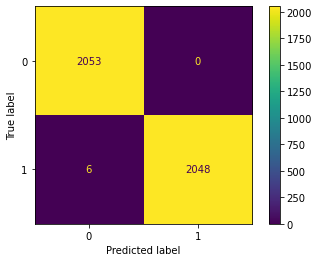

In [25]:
start = timer()
#Train the model using the training sets
pipe_normal_rus.fit(X_train_rus,y_train_rus)
# 
y_predXGB = pipe_normal_rus.predict(X_test_rus)
print('\n')
print(classification_report(y_test_rus, y_predXGB))
print(confusion_matrix(y_test_rus, y_predXGB))
print(xgb_normal_rus)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predXGB)), 
                              display_labels=pipe_normal_rus.named_steps['xgb'].classes_)
disp.plot()
df = pd.DataFrame(pipe_normal_rus.named_steps['xgb'].feature_importances_, index=X_test_rus.columns, 
                  columns=["XGB %-importance"])
print(df.sort_values("XGB %-importance", axis=0, ascending=False))
# 
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### XGB Classifier Model with Non-Standarized Under Sampled Dataset



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


                    XGB %-im

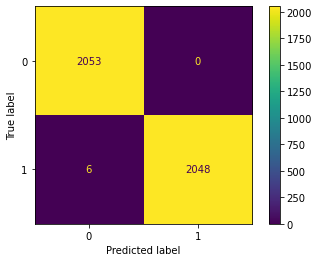

In [26]:
start = timer()
# Standard XGB Model
xgb_rus_ns = XGBClassifier(**params_xgb)

#Train the model using the training sets
xgb_rus_ns.fit(X_train_rus,y_train_rus)
# 
y_predXGB_ns = xgb_rus_ns.predict(X_test_rus)
print('\n')
print(classification_report(y_test_rus, y_predXGB_ns))
print(xgb_rus_ns)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predXGB_ns)), 
                              display_labels=xgb_rus_ns.classes_)
disp.plot()
df = pd.DataFrame(xgb_rus_ns.feature_importances_, index=X_test_rus.columns, columns=["XGB %-importance"])
print(df.sort_values("XGB %-importance", axis=0, ascending=False))

end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### XGB Classifier Model with Non Standarized Full sample Data



              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       1.00      1.00      1.00      2053

    accuracy                           1.00   1590655
   macro avg       1.00      1.00      1.00   1590655
weighted avg       1.00      1.00      1.00   1590655

[[1588602       0]
 [      8    2045]]
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='approx',
              use_label_encoder=False, validate_parameters=1, verbos

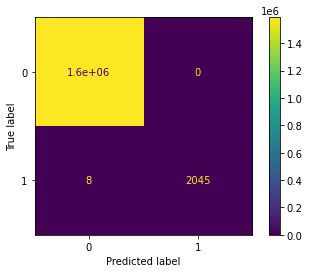

In [27]:
# 
start = timer()
# Standard XGB Model
xgb_nsf = XGBClassifier(**params_xgb)

#Train the model using the training sets
xgb_nsf.fit(X_train_nsf,y_train_nsf)
# 
y_predXGB_nsf = xgb_nsf.predict(X_test_nsf)
print('\n')
print(classification_report(y_test_nsf, y_predXGB_nsf))
print(confusion_matrix(y_test_nsf, y_predXGB_nsf))
print(xgb_nsf)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_nsf, y_predXGB_nsf)), 
                              display_labels=xgb_nsf.classes_)
disp.plot()
df = pd.DataFrame(xgb_nsf.feature_importances_, index=X_test_nsf.columns, columns=["XGB %-importance"])
print(df.sort_values("XGB %-importance", axis=0, ascending=False))

end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### XGB Classifier Model with NON-Standarized SMOTE Dataset



              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       1.00      1.00      1.00   1588602

    accuracy                           1.00   3177204
   macro avg       1.00      1.00      1.00   3177204
weighted avg       1.00      1.00      1.00   3177204

[[1588376     226]
 [    144 1588458]]
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='approx',
              use_label_encoder=False, validate_parameters=1, verbos

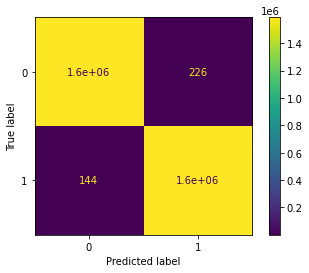

In [28]:
start = timer()
# Standard XGB Model
xgb_ = XGBClassifier(**params_xgb)

#Train the model using the training sets
xgb_.fit(X_train_nso,y_train_nso)
# 
y_predXGB_nso = xgb_.predict(X_test_nso)
print('\n')
print(classification_report(y_test_nso, y_predXGB_nso))
print(confusion_matrix(y_test_nso, y_predXGB_nso))
print(xgb_)
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_nso, y_predXGB_nso)), 
                              display_labels=xgb_.classes_)
disp.plot()
df = pd.DataFrame(xgb_.feature_importances_, index=X_test_nso.columns, columns=["XGB %-importance"])
print(df.sort_values("XGB %-importance", axis=0, ascending=False))

end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### XGB Classifier Model with NON-Standarized SMOTETomek Dataset

In [29]:
# # from xgboost import XGBClassifier
# start = timer()
# # 
# params_fixed = {
#     'objective':'binary:logistic',
#     'use_label_encoder' : False,
#     'n_jobs' : (-1),
#     'eval_metric' : 'auc',
#     'random_state' : seed
# }
# # Standard XGB Model
# xgb_smt = XGBClassifier(**params_fixed)

# #Train the model using the training sets
# xgb_smt.fit(X_train_nso,y_train_nso)
# # 
# y_predXGB_smt_nso = xgb_smt.predict(X_test_nso)
# print('\n')
# print(classification_report(y_test_smt_nso, y_predXGB_smt_nso))
# print(confusion_matrix(y_test_smt_nso, y_predXGB_smt_nso))
# print(xgb_smt)
# print('\n')
# disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_smt_nso, y_predXGB_smt_nso)), 
#                               display_labels=xgb_smt.classes_)
# disp.plot()
# df = pd.DataFrame(xgb_smt.feature_importances_, index=X_test_smt_nso.columns, columns=["XGB %-importance"])
# print(df.sort_values("XGB %-importance", axis=0, ascending=False))

# end = timer()
# print('\n')
# print(f'{(end - start)/60} Min elapsed.')

#### XGB GridSearchCV with StratifiedKFold & Standarized Under Sampled Dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=340, n_jobs=-1,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


0.0889674316999996 Min elaps

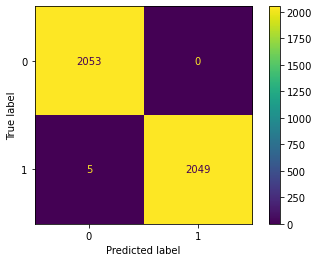

In [30]:
# 
from sklearn.model_selection import StratifiedKFold
# 
start = timer()
# 
n_folds = 3
skf = StratifiedKFold(n_splits=n_folds, random_state=seed, shuffle=True)
# 
params_grid = {
    'n_estimators': range(340, 360, 5,),
#     'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
}
# create xgboost classifier
xgb_cl1 = XGBClassifier(**params_xgb)

# 
xgb_grid = GridSearchCV(estimator=xgb_cl1, param_grid=params_grid, 
                               cv=skf.split(X_train_rus, y_train_rus), scoring='f1')

#Train the model using the training sets
xgb_grid.fit(X_train_rus,y_train_rus)
# 
y_predXGB1 = xgb_grid.predict(X_test_rus)

print(classification_report(y_test_rus, y_predXGB1))
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predXGB1)), 
                              display_labels=xgb_grid.classes_)
disp.plot()
print('\n')
print(xgb_grid.best_estimator_)
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### XGB GridSearchCV with StratifiedKFold & NON Standarized Under Sampled Dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
0.07102475891667079 Min elapse

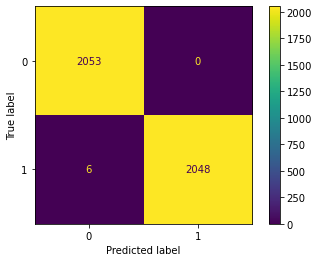

In [31]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold
# Non Standarized Dataset
start = timer()
# 
n_folds = 3
skf = StratifiedKFold(n_splits=n_folds, random_state=seed, shuffle=True)
# 
params_grid = {
# 'n_estimators': range(340, 360, 5,),
'n_estimators': [200, 340, 500],
# 'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.6],
}
# create xgboost classifier
xgb_cl2 = XGBClassifier(**params_xgb)

# 
xgb_grid2 = GridSearchCV(estimator=xgb_cl2, param_grid=params_grid, 
                               cv=skf.split(X_train_rus, y_train_rus), scoring='f1')

#Train the model using the training sets
xgb_grid2.fit(X_train_rus,y_train_rus)
# 
y_predXGB2 = xgb_grid2.predict(X_test_rus)

print(classification_report(y_test_rus, y_predXGB2))
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predXGB2)), 
                              display_labels=xgb_grid2.classes_)
disp.plot()
print('\n')
print(xgb_grid2.best_estimator_)
end = timer()
print(f'{(end - start)/60} Min elapsed.')

# LGBM Classifier

#### LGBM Classifier Model Pipeline

In [32]:
# Pipeline
# 
params_lgbm = {
    'num_threads' : (8),
    'n_jobs' : (-1),
    'random_state' : seed,
}
# 
lgbm_scaler_rus = [('scaler', StandardScaler()), ('lgbm', LGBMClassifier(**params_lgbm))]
lgbm_normal_rus = [('normal', MinMaxScaler()), ('lgbm', LGBMClassifier(**params_lgbm))]
lgbm_scaler_nso = [('scaler', StandardScaler()), ('lgbm', LGBMClassifier(**params_lgbm))]
lgbm_normal_nsf = [('normal', MinMaxScaler()), ('lgbm', LGBMClassifier(**params_lgbm))]
# under sample
pipe_scaler_rus = Pipeline(lgbm_scaler_rus)
pipe_normal_rus = Pipeline(lgbm_normal_rus)
# Over sample (SMOTE)
pipe_nso = Pipeline(lgbm_scaler_nso)
# Full
pipe_nsf = Pipeline(lgbm_normal_nsf)

### LGBM Classifier with Scaler Under-Sampled Dataset

[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

[[2053    0]
 [   6 2048]]


Pipeline(steps=[('scaler', StandardScaler()),
                ('lgbm', LGBMClassifier(num_threads=8, random_state=1))])


0.0025132728666752277 Min elapsed.


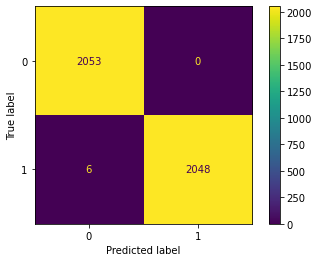

In [33]:
# 
start = timer()
#Train the model using the training sets
pipe_scaler_rus.fit(X_train_rus, y_train_rus)
# 
y_predLGB = pipe_scaler_rus.predict(X_test_rus)
print('\n')
print(classification_report(y_test_rus, y_predLGB))
print(confusion_matrix(y_test_rus, y_predLGB))
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predLGB)), 
                              display_labels=pipe_scaler_rus.named_steps['lgbm'].classes_)
disp.plot()
print('\n')
print(pipe_scaler_rus)
print('\n')
end = timer()
print(f'{(end - start)/60} Min elapsed.')

### LGBM Classifier with Normalize Under-Sampled Dataset

[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

[[2053    0]
 [   6 2048]]


Pipeline(steps=[('scaler', StandardScaler()),
                ('lgbm', LGBMClassifier(num_threads=8, random_state=1))])


0.0022595469833352885 Min elapsed.


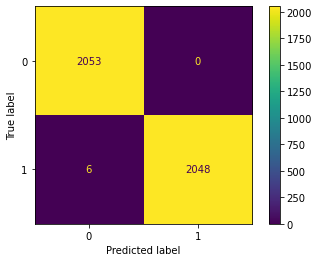

In [34]:
# 
start = timer()
#Train the model using the training sets
pipe_normal_rus.fit(X_train_rus, y_train_rus)
# 
y_predLGB = pipe_normal_rus.predict(X_test_rus)
print('\n')
print(classification_report(y_test_rus, y_predLGB))
print(confusion_matrix(y_test_rus, y_predLGB))
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predLGB)), 
                              display_labels=pipe_normal_rus.named_steps['lgbm'].classes_)
disp.plot()
print('\n')
print(pipe_scaler_rus)
print('\n')
end = timer()
print(f'{(end - start)/60} Min elapsed.')

### LGBM Classifier with NON-Standarized Under-Sampled Dataset¶

[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2053
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

[[2053    0]
 [   6 2048]]


LGBMClassifier(num_threads=8, random_state=1)


0.00226217119999698 Min elapsed.


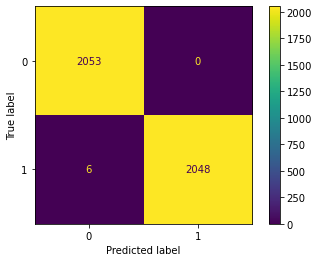

In [35]:
# from lightgbm import LGBMClassifier
start = timer()
# Define model
lgb_ns = LGBMClassifier(**params_lgbm)

#Train the model using the training sets
lgb_ns.fit(X_train_rus,y_train_rus)
# 
y_predLGB_ns=lgb_ns.predict(X_test_rus)
print('\n')
print(classification_report(y_test_rus, y_predLGB_ns))
print(confusion_matrix(y_test_rus, y_predLGB_ns))
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predLGB_ns)), 
                              display_labels=lgb_ns.classes_)
disp.plot()
print('\n')
print(lgb_ns)
print('\n')
end = timer()
print(f'{(end - start)/60} Min elapsed.')

#### LGBM Classifier with NON-Standarized Full Dataset

[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.00      0.00      0.00      2053

    accuracy                           1.00   1590655
   macro avg       0.50      0.50      0.50   1590655
weighted avg       1.00      1.00      1.00   1590655

[[1587990     612]
 [   2051       2]]


LGBMClassifier(num_threads=8, random_state=1)


0.2041649682999984 Min elapsed.


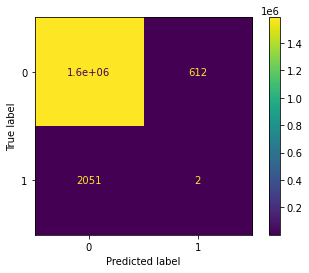

In [36]:
# from lightgbm import LGBMClassifier
start = timer()
# Define model
lgb_nsf = LGBMClassifier(**params_lgbm)

#Train the model using the training sets
lgb_nsf.fit(X_train_nsf,y_train_nsf)
# 
y_predLGB_nsf = lgb_nsf.predict(X_test_nsf)
print('\n')
print(classification_report(y_test_nsf, y_predLGB_nsf))
print(confusion_matrix(y_test_nsf, y_predLGB_nsf))
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_nsf, y_predLGB_nsf)), 
                              display_labels=lgb_nsf.classes_)
disp.plot()
print('\n')
print(lgb_nsf)
print('\n')
end = timer()
print(f'{(end - start)/60} Min elapsed.')

#### LGBM Classifier with NON-Standarized SMOTE Dataset

[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       1.00      1.00      1.00   1588602

    accuracy                           1.00   3177204
   macro avg       1.00      1.00      1.00   3177204
weighted avg       1.00      1.00      1.00   3177204

[[1588405     197]
 [    471 1588131]]


LGBMClassifier(num_threads=8, random_state=1)


0.4705398670666758 Min elapsed.


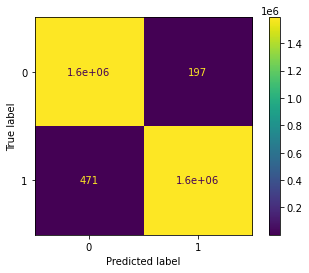

In [37]:
# from lightgbm import LGBMClassifier
start = timer()
# Define model
lgb_nso = LGBMClassifier(**params_lgbm)

#Train the model using the training sets
lgb_nso.fit(X_train_nso,y_train_nso)
# 
y_predLGB_nso = lgb_nso.predict(X_test_nso)
print('\n')
print(classification_report(y_test_nso, y_predLGB_nso))
print(confusion_matrix(y_test_nso, y_predLGB_nso))
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_nso, y_predLGB_nso)), 
                              display_labels=lgb_nso.classes_)
disp.plot()
print('\n')
print(lgb_nso)
print('\n')
end = timer()
print(f'{(end - start)/60} Min elapsed.')

#### Standard LGBM Classifier with NON-Standarized SMOTETomek Dataset

In [38]:
# # from lightgbm import LGBMClassifier
# start = timer()
# # 
# params_fixed = {
#     'n_jobs' : (-1),
#     'random_state' : seed,
# }
# # Define model
# lgb_smt = LGBMClassifier(**params_fixed)

# #Train the model using the training sets
# lgb_smt.fit(X_train_smt_nso,y_train_smt_nso)
# # 
# y_predLGB_smt_nso = lgb_smt.predict(X_test_smt_nso)
# print('\n')
# print(classification_report(y_test_smt_nso, y_predLGB_nso))
# print(confusion_matrix(y_test_smt_nso, y_predLGB_smt_nso))
# disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_smt_nso, y_predLGB_smt_nso)), 
#                               display_labels=lgb_smt.classes_)
# disp.plot()
# print('\n')
# print(lgb_smt)
# end = timer()
# print(f'{(end - start)/60} Min elapsed.')

# Support Vector Machine

#### SVM Classifier Model Pipeline

In [13]:
# Pipeline
# 
params_svc = {
    'gamma' : 'auto',
#     'gamma' : 'scale',
    'probability' : True,
    'random_state' : seed,
}
# 
svc_scaler_rus = [('scaler', StandardScaler()), ('svm', svm.SVC(**params_svc))]
svc_normal_rus = [('normal', MinMaxScaler()), ('svm', svm.SVC(**params_svc))]
svc_scaler_nso = [('scaler', StandardScaler()), ('svm', svm.SVC(**params_svc))]
svc_normal_nsf = [('normal', MinMaxScaler()), ('svm', svm.SVC(**params_svc))]
# under sample
pipe_scaler_rus = Pipeline(svc_scaler_rus)
pipe_normal_rus = Pipeline(svc_normal_rus)
# Over sample (SMOTE)
pipe_nso = Pipeline(svc_scaler_nso)
# Full
pipe_nsf = Pipeline(svc_normal_nsf)

#### Support Vector Machine Classifier with Scaler Under-Sampled Dataset

6.72 s ± 86.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2053
           1       0.92      0.99      0.95      2054

    accuracy                           0.95      4107
   macro avg       0.96      0.95      0.95      4107
weighted avg       0.96      0.95      0.95      4107

[[1880  173]
 [  21 2033]]


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(gamma='auto', probability=True, random_state=1))])


0.9127855526999914 Min elapsed.


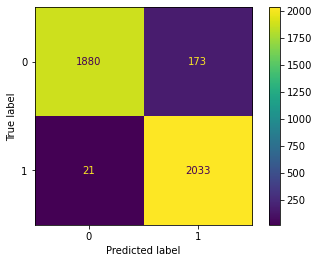

In [40]:
# 
start = timer()
# Train / Fit Model
%timeit pipe_scaler_rus.fit(X_train_rus, y_train_rus)
# 
y_predSVC_rus = pipe_scaler_rus.predict(X_test_rus)
print('\n')
print(classification_report(y_test_rus, y_predSVC_rus))
print(confusion_matrix(y_test_rus, y_predSVC_rus))

disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predSVC_rus)), 
                              display_labels=pipe_scaler_rus.named_steps['svm'].classes_)
disp.plot()
print('\n')
print(pipe_scaler_rus)
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### Support Vector Machine Classifier with Normalize Under-Sampled Dataset

18.9 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2053
           1       0.92      0.99      0.95      2054

    accuracy                           0.95      4107
   macro avg       0.96      0.95      0.95      4107
weighted avg       0.96      0.95      0.95      4107

[[1880  173]
 [  21 2033]]


Pipeline(steps=[('normal', MinMaxScaler()),
                ('svm', SVC(gamma='auto', probability=True, random_state=1))])


2.531763876916678 Min elapsed.


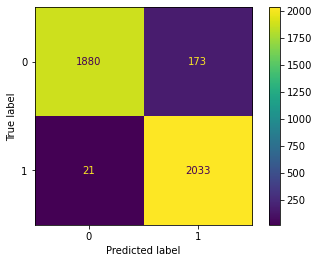

In [41]:
# 
start = timer()
# Train / Fit Model
%timeit pipe_normal_rus.fit(X_train_rus, y_train_rus)
# 
y_predSVC_rus = pipe_scaler_rus.predict(X_test_rus)
print('\n')
print(classification_report(y_test_rus, y_predSVC_rus))
print(confusion_matrix(y_test_rus, y_predSVC_rus))

disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_rus, y_predSVC_rus)), 
                              display_labels=pipe_normal_rus.named_steps['svm'].classes_)
disp.plot()
print('\n')
print(pipe_normal_rus)
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### Support Vector Machine Classifier with Standarized Full Dataset¶

In [ ]:
# from sklearn import svm
start = timer()
# Train / Fit Model
%timeit pipe_nsf.fit(X_train_nsf, y_train_nsf)
# 
y_predSVC_sf = pipe_nsf.predict(X_test_nsf)
print('\n')
print(classification_report(y_test_nsf, y_predSVC_nsf))
print(confusion_matrix(y_test_nsf, y_predSVC_nsf))

disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_nsf, y_predSVC_sf)), 
                              display_labels=pipe_nsf.named_steps['svm'].classes_)
disp.plot()
print('\n')
print(pipe_nsf)
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### Support Vector Machine Classifier with Standardized SMOTE Dataset¶

In [ ]:
# from sklearn import svm
start = timer()
# Train / Fit Model
%timeit pipe_nso.fit(X_train_nso, y_train_nso)
# 
y_predSVC_so = pipe_nso.predict(X_test_nso)
print('\n')
print(classification_report(y_test_nso, y_predSVC_nso))
print(confusion_matrix(y_test_nso, y_predSVC_nso))

disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_nso, y_predSVC_so)), 
                              display_labels=pipe_nso.named_steps['svm'].classes_)
disp.plot()
print('\n')
print(svm_so)
end = timer()
print('\n')
print(f'{(end - start)/60} Min elapsed.')

#### Support Vector Machine Classifier with Standardized SMOTETomek Dataset

In [ ]:
# # from sklearn import svm
# start = timer()
# # 
# params_fixed = {
# #     'gamma' : 'scale',
#     'probability' : True,
#     'random_state' : seed,
# }
# # Define Model
# svm_smt = svm.SVC(**params_fixed)

# # Train / Fit Model
# %timeit svm_smt.fit(X_train_smt, y_train_smt)
# # 
# y_predSVC_smt = svm_smt.predict(X_test_smt)
# print('\n')
# print(classification_report(y_test_smt, y_predSVC_smt))
# print(confusion_matrix(y_test_smt, y_predSVC_smt))

# disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test_smt, y_predSVC_smt)), 
#                               display_labels=svm_smt.classes_)
# disp.plot()
# print('\n')
# print(svm_smt)
# end = timer()
# print('\n')
# print(f'{(end - start)/60} Min elapsed.')

In [ ]:
# # predict probabilities
# pred_prob1 = rfc_.predict_proba(X_test_u)
# pred_prob2 = xgb.predict_proba(X_test_u)
# pred_prob3 = lgb.predict_proba(X_test_u)

# # roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(y_test_u, pred_prob1[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test_u, pred_prob2[:,1], pos_label=1)
# fpr3, tpr3, thresh3 = roc_curve(y_test_u, pred_prob3[:,1], pos_label=1)


# # roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(y_test_u))]
# p_fpr, p_tpr, _ = roc_curve(y_test_u, random_probs, pos_label=1)

In [ ]:
# # matplotlib
# plt.style.use('seaborn')
# sns.set(font_scale = 1.5)
# plt.figure(figsize=(10,10))

# # plot roc curves
# plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
# plt.plot(fpr2, tpr2, linestyle='--',color='red', label='XGB')
# plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='LGBM')
# plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# # title
# plt.title('ROC curve')
# # x label
# plt.xlabel('False Positive Rate')
# # y label
# plt.ylabel('True Positive rate')

# plt.legend(loc='best')
# plt.show()